In [1]:
# Add dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
import requests
from config import weather_api_key
from citipy import citipy
import gmaps
from config import g_key

In [2]:
# Starting url for weather api 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)

In [4]:
# Use tuple() to display lat and lng combinations
coordinates = zip(lats, lngs)
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name)
 

new norfolk
tshikapa
busselton
clinton
ribeira grande
rikitea
nikolskoye
cape town
mingaora
mar del plata
oksfjord
mahebourg
comodoro rivadavia
puerto ayora
santa maria
ati
albany
jamestown
busselton
namibe
punta arenas
kodinsk
butaritari
bluff
bluff
mys shmidta
kahului
kaitangata
lubango
zhezkazgan
tecolutla
kastamonu
grand river south east
bluff
avarua
ushuaia
talcahuano
victoria
anadyr
quatre cocos
mataura
cabadiangan
barrow
formosa do rio preto
alice springs
bullhead city
bambous virieux
upernavik
colac
okakarara
ambodifototra
arlit
babanusah
port alfred
albany
tasiilaq
mamaku
atuona
east london
pisco
visby
tautira
east london
taolanaro
sentyabrskiy
svetlogorsk
atuona
yithion
tasiilaq
teya
palamos
georgetown
bluff
sur
lagoa
severo-kurilsk
srednekolymsk
jamestown
hilo
airai
kieta
ballina
hasaki
baindur
albany
taolanaro
bredasdorp
castro
gomfoi
ribeira grande
saint-philippe
ayagoz
atuona
taolanaro
butaritari
danshui
mataura
butaritari
tuktoyaktuk
gizo
rikitea
arraial do cabo
cody
roa

In [5]:
coordinates = zip(lats, lngs)
# Create list for holding cities
cities = []

# Identify nearest city for each lat and lng combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, add city to list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(len(cities))
print(cities[0])

269
new norfolk


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all cities in list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | tshikapa
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | clinton
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | mingaora
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | oksfjord
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | comodoro rivadavia
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | santa maria
Processing Record 16 of Set 1 | ati
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | kodinsk
Processing Record 22 of Set 1 | butaritari
Processing Recor

Processing Record 37 of Set 4 | cabedelo
Processing Record 38 of Set 4 | coachella
Processing Record 39 of Set 4 | pilar
Processing Record 40 of Set 4 | provideniya
Processing Record 41 of Set 4 | fresno
Processing Record 42 of Set 4 | saint-pierre
Processing Record 43 of Set 4 | necochea
Processing Record 44 of Set 4 | jatai
Processing Record 45 of Set 4 | rocha
Processing Record 46 of Set 4 | lujan
Processing Record 47 of Set 4 | adre
Processing Record 48 of Set 4 | tres arroyos
Processing Record 49 of Set 4 | dikson
Processing Record 50 of Set 4 | lop buri
Processing Record 1 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 2 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 5 | qaanaaq
Processing Record 4 of Set 5 | voh
Processing Record 5 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 6 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 5 | buarcos
Processing Record 8 of Set 5 | kapoeta
Processing Recor

In [7]:
len(city_data)

246

In [8]:
# Convert city_data to a data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,55.92,56,100,9.98,AU,2022-04-30 15:15:40
1,Tshikapa,-6.4167,20.8000,82.02,76,79,2.30,CD,2022-04-30 15:15:41
2,Busselton,-33.6500,115.3333,56.70,82,0,5.82,AU,2022-04-30 15:15:41
3,Clinton,42.5870,-82.9199,55.51,52,100,9.22,US,2022-04-30 15:15:40
4,Ribeira Grande,38.5167,-28.7000,66.60,77,75,11.50,PT,2022-04-30 15:15:42


In [9]:
# Reorder the columns City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2022-04-30 15:15:40,-42.7826,147.0587,55.92,56,100,9.98
1,Tshikapa,CD,2022-04-30 15:15:41,-6.4167,20.8000,82.02,76,79,2.30
2,Busselton,AU,2022-04-30 15:15:41,-33.6500,115.3333,56.70,82,0,5.82
3,Clinton,US,2022-04-30 15:15:40,42.5870,-82.9199,55.51,52,100,9.22
4,Ribeira Grande,PT,2022-04-30 15:15:42,38.5167,-28.7000,66.60,77,75,11.50


In [10]:
# Create output file
output_data_file = "weather_data/cities.csv"

# Export data into CSV file
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from data frame for plotting
lats = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Get today's time in seconds
today = time.time()
today

1651332244.0503418

In [13]:
# Convert time to formatted date
today = time.strftime("%x")
today

'04/30/22'

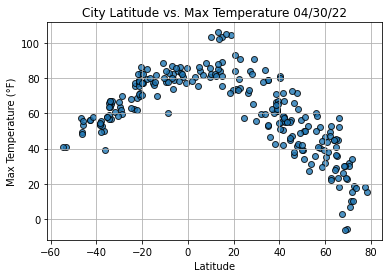

In [14]:
# Build scatter plot for latitude vs. max temp
plt.scatter(lats,
           max_temp,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

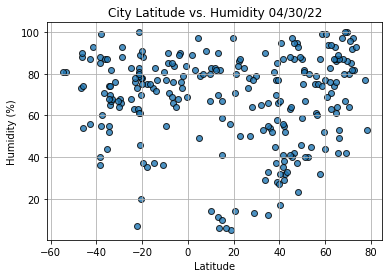

In [15]:
# Build scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

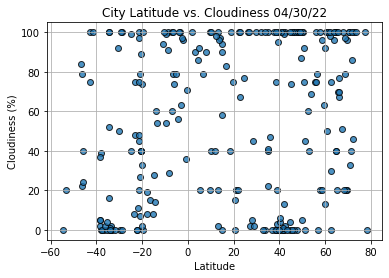

In [16]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

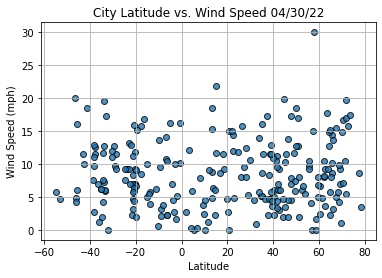

In [17]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) # MAY OR MAY NOT PRINT???
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Locate data for latitudes greater than or equal to zero
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Clinton,US,2022-04-30 15:15:40,42.5870,-82.9199,55.51,52,100,9.22
4,Ribeira Grande,PT,2022-04-30 15:15:42,38.5167,-28.7000,66.60,77,75,11.50
6,Nikolskoye,RU,2022-04-30 15:15:43,59.7035,30.7861,46.29,44,92,7.94
8,Mingaora,PK,2022-04-30 15:15:43,34.7758,72.3625,78.58,33,22,5.19
10,Oksfjord,NO,2022-04-30 15:15:44,70.2396,22.3479,32.07,80,100,14.79


In [20]:
# Create data frames for northern and southern hemispheres
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

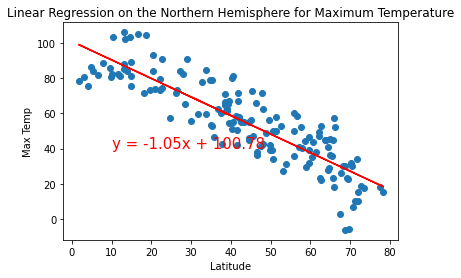

In [21]:
# Linear regression on northern hemispehere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                       'Max Temp',(10,40))

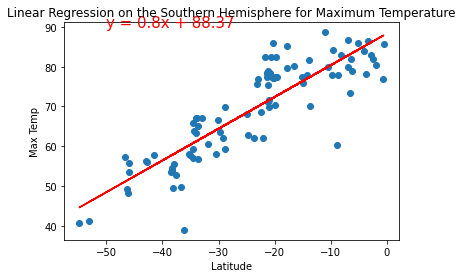

In [22]:
# Linear regression on southern hemispehere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',(-50,90))

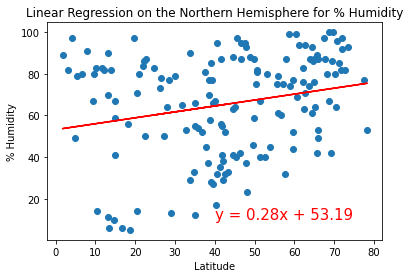

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',(40,10))

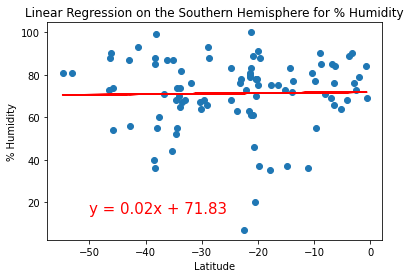

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity',
                       '% Humidity',(-50,15))

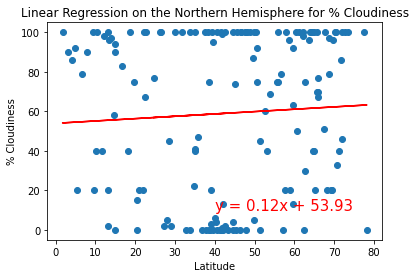

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness',
                       '% Cloudiness',(40,10))

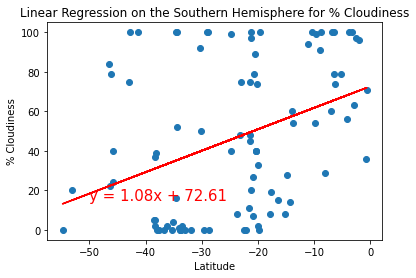

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness',
                       '% Cloudiness',(-50,15))

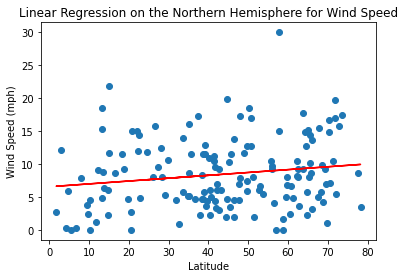

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed',
                       'Wind Speed (mph)',(40,35))

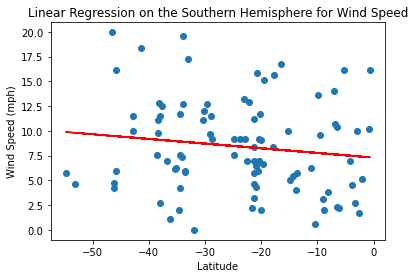

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed',
                       'Wind Speed (mph)',(-50,35))

In [29]:
# Store CSV created into data frame
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,New Norfolk,AU,2022-04-30 15:15:40,-42.7826,147.0587,55.92,56,100,9.98
1,1,Tshikapa,CD,2022-04-30 15:15:41,-6.4167,20.8000,82.02,76,79,2.30
2,2,Busselton,AU,2022-04-30 15:15:41,-33.6500,115.3333,56.70,82,0,5.82
3,3,Clinton,US,2022-04-30 15:15:40,42.5870,-82.9199,55.51,52,100,9.22
4,4,Ribeira Grande,PT,2022-04-30 15:15:42,38.5167,-28.7000,66.60,77,75,11.50


In [30]:
# Check data types for gmaps, which can only be int and floats
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [31]:
# Configure gmaps
gmaps.configure(api_key=g_key)

In [43]:
# Heatmap of temperature
# Get lat and lng
locations = city_data_df[["Lat", "Lng"]]

# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = [max(temp, 0) for temp in max_temp]

# Assign figure variable
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

# Assign heat map variable
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4)

# Add heatmap layer
fig.add_layer(heat_layer)

# Call fig to plot data
fig

Figure(layout=FigureLayout(height='420px'))

In [44]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call Fig
fig

Figure(layout=FigureLayout(height='420px'))

In [45]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call Fig
fig

Figure(layout=FigureLayout(height='420px'))

In [46]:
# Heatmap of wind speed
locations = city_data_df[["Lat", "Lng"]]
wind_speed = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind_speed, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call Fig
fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
# Ask customer to input min and max temperature value
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip?75
What is the maximum temperature you would like for your trip?90


In [51]:
# Filter data frame to find cities that fit above criteria and drop any null values
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) &
                                       (city_data_df["Max Temp"] >= min_temp)].dropna()
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Tshikapa,CD,2022-04-30 15:15:41,-6.4167,20.8000,82.02,76,79,2.30
5,5,Rikitea,PF,2022-04-30 15:15:42,-23.1203,-134.9692,75.70,76,48,13.18
8,8,Mingaora,PK,2022-04-30 15:15:43,34.7758,72.3625,78.58,33,22,5.19
11,11,Mahebourg,MU,2022-04-30 15:15:45,-20.4081,57.7000,77.29,78,40,6.91
13,13,Puerto Ayora,EC,2022-04-30 15:15:45,-0.7393,-90.3518,76.96,84,36,10.20
18,18,Namibe,AO,2022-04-30 15:15:47,-15.1961,12.1522,77.40,73,8,9.98
21,21,Butaritari,KI,2022-04-30 15:15:48,3.0707,172.7902,80.62,82,90,12.03
25,25,Lubango,AO,2022-04-30 15:15:50,-14.9172,13.4925,75.88,37,28,5.03
27,27,Tecolutla,MX,2022-04-30 15:15:51,20.4833,-97.0167,84.06,71,15,2.77
29,29,Avarua,CK,2022-04-30 15:15:52,-21.2078,-159.7750,78.85,83,20,4.61


In [53]:
preferred_cities_df.count()

City_ID       70
City          70
Country       70
Date          70
Lat           70
Lng           70
Max Temp      70
Humidity      70
Cloudiness    70
Wind Speed    70
dtype: int64

In [54]:
# Create data frame for hotels
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Tshikapa,CD,82.02,-6.4167,20.8000,
5,Rikitea,PF,75.70,-23.1203,-134.9692,
8,Mingaora,PK,78.58,34.7758,72.3625,
11,Mahebourg,MU,77.29,-20.4081,57.7000,
13,Puerto Ayora,EC,76.96,-0.7393,-90.3518,
18,Namibe,AO,77.40,-15.1961,12.1522,
21,Butaritari,KI,80.62,3.0707,172.7902,
25,Lubango,AO,75.88,-14.9172,13.4925,
27,Tecolutla,MX,84.06,20.4833,-97.0167,
29,Avarua,CK,78.85,-21.2078,-159.7750,


In [55]:
# Set payload to search for hotels
payload = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [56]:
# Iterate through hotel data frame
for index, row in hotel_df.iterrows():
    # Get lat and lng
    lat = row["Lat"]
    lng = row["Lng"]
    
    # Add lat and lng to location key for payload dict
    payload["location"] = f"{lat},{lng}"
    
    # Use search term "lodging" and our lat and lng
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # Make request
    hotels = requests.get(base_url, params=payload).json()
    
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.


In [57]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Tshikapa,CD,82.02,-6.4167,20.8000,Hôtel Tshia-Muntu de Tshikapa
5,Rikitea,PF,75.70,-23.1203,-134.9692,People ThankYou
8,Mingaora,PK,78.58,34.7758,72.3625,Burj Al Swat
11,Mahebourg,MU,77.29,-20.4081,57.7000,Shandrani Beachcomber Resort & Spa
13,Puerto Ayora,EC,76.96,-0.7393,-90.3518,Finch Bay Galapagos Hotel
18,Namibe,AO,77.40,-15.1961,12.1522,Hotel Chik Chik Namibe
21,Butaritari,KI,80.62,3.0707,172.7902,Isles Sunset Lodge
25,Lubango,AO,75.88,-14.9172,13.4925,Hotel Serra da Chela
27,Tecolutla,MX,84.06,20.4833,-97.0167,Hotel Plaza Marsol
29,Avarua,CK,78.85,-21.2078,-159.7750,Paradise Inn


In [59]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [60]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [61]:
# Store data frame row
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [62]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))